# **Hands-on Activity 11.2 Classification using Logistic Regression**
| Course: CPE 311 | Program: BSCpE |
|--- | --- |
| **Course Title**: Computational Thinking with Python | **Date Performed:** April 27 , 2024 |
| **Section:** BSCPE22S3 | **Date Submitted:** April 28, 2024 |
| **Student Name**: John Louie V. Adornado | **Instructor's Name:** Engr. Roman Richard |

In [1]:
pip install ucimlrepo

In [2]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [5]:
df = pd.concat([X, y], axis = 1)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
df.shape

(858, 36)

In [7]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [8]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [10]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
categorical = [var for var in df.columns if df[var].dtype=='0']
print('There are  {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are  0 categorical variables

The categorical variables are : []


In [19]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B  

In [21]:
df.fillna(df.median(), inplace=True)

In [22]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [53]:
print('STDs:HIV contains', len(df['STDs:HIV'].unique()), 'labels')


STDs:HIV contains 2 labels


In [56]:
df['STDs:HIV'].unique()

array([0., 1.])

In [58]:
df['STDs:HIV'].value_counts()


STDs:HIV
0.0    840
1.0     18
Name: count, dtype: int64

In [59]:
print('Dx:Cancer contains', len(df['Dx:Cancer'].unique()), 'labels')

Dx:Cancer contains 2 labels


In [60]:
df['Dx:Cancer'].unique()

array([0, 1])

In [61]:
df['Dx:Cancer'].value_counts()

Dx:Cancer
0    840
1     18
Name: count, dtype: int64

In [64]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

numerical_summary = df[numerical_columns].describe().round(2)
print(numerical_summary)


          Age  Number of sexual partners  First sexual intercourse  \
count  858.00                     858.00                    858.00   
mean    26.82                       2.51                     17.00   
std      8.50                       1.64                      2.79   
min     13.00                       1.00                     10.00   
25%     20.00                       2.00                     15.00   
50%     25.00                       2.00                     17.00   
75%     32.00                       3.00                     18.00   
max     84.00                      28.00                     32.00   

       Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
count              858.00  858.00          858.00               858.00   
mean                 2.26    0.14            1.20                 0.45   
std                  1.40    0.35            4.06                 2.21   
min                  0.00    0.00            0.00                 0.00   

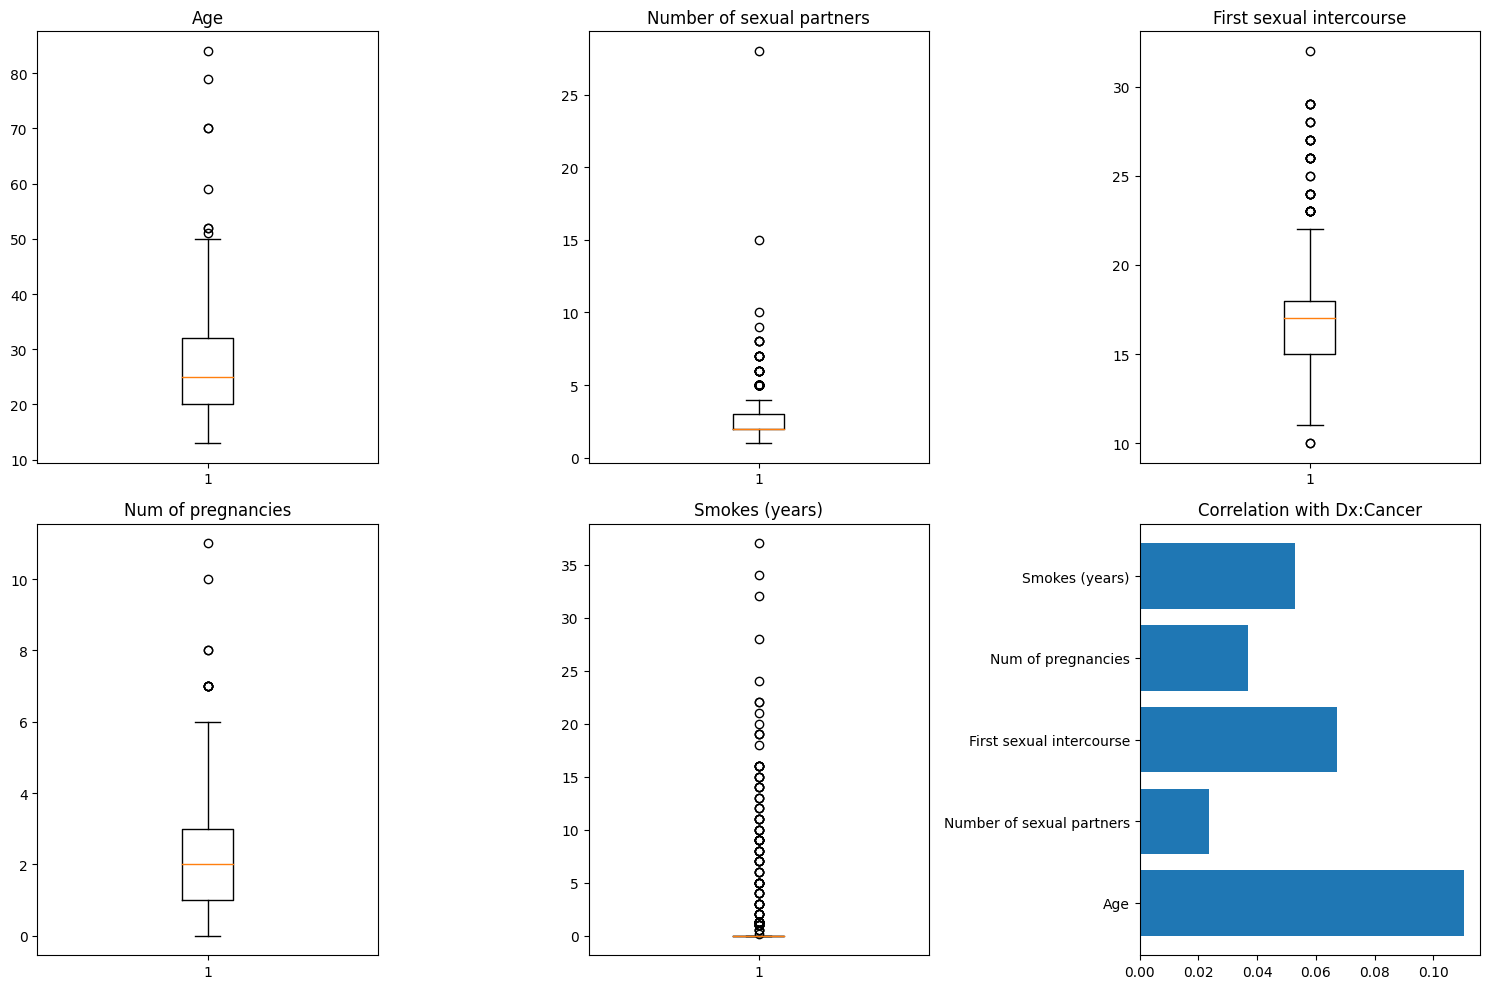

In [67]:
import matplotlib.pyplot as plt

selected_features = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                     'Num of pregnancies', 'Smokes (years)']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, feature in enumerate(selected_features):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(df[feature].dropna())
    axes[row, col].set_title(feature)

correlation = df[selected_features + ['Dx:Cancer']].corr()['Dx:Cancer']
axes[1, 2].barh(correlation.index[:-1], correlation.values[:-1])
axes[1, 2].set_title('Correlation with Dx:Cancer')
plt.tight_layout()
plt.show()


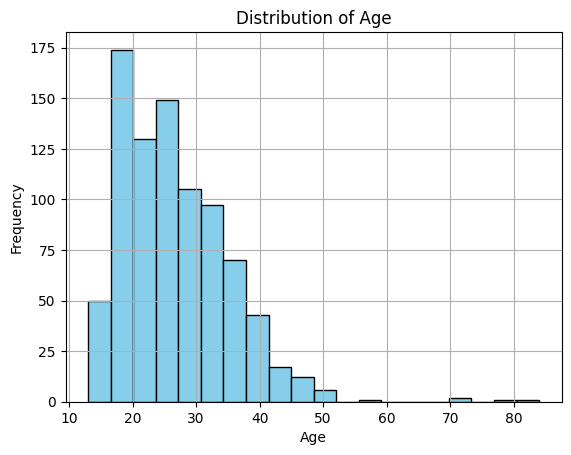

In [69]:

plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()


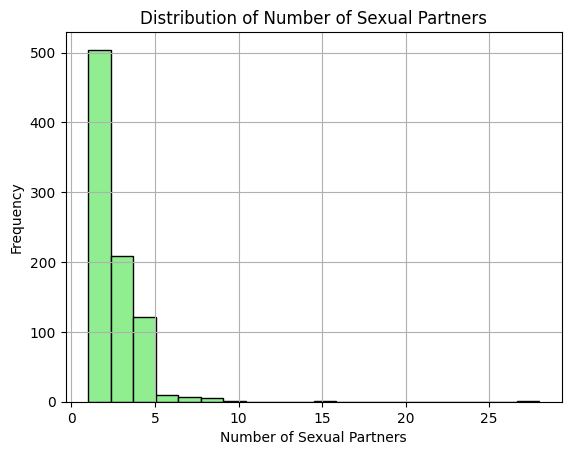

In [70]:

plt.hist(df['Number of sexual partners'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Sexual Partners')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sexual Partners')
plt.grid(True)
plt.show()


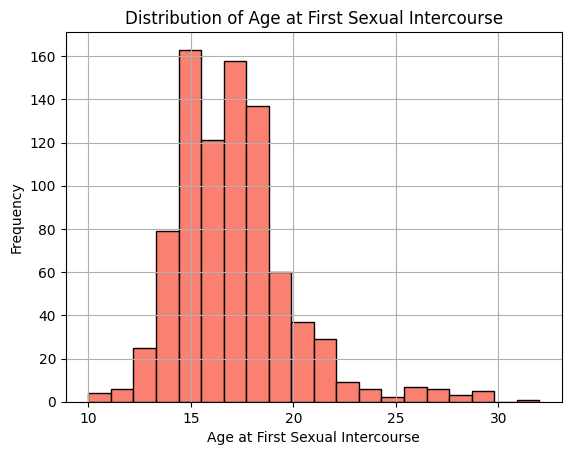

In [71]:

plt.hist(df['First sexual intercourse'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.xlabel('Age at First Sexual Intercourse')
plt.ylabel('Frequency')
plt.title('Distribution of Age at First Sexual Intercourse')
plt.grid(True)
plt.show()


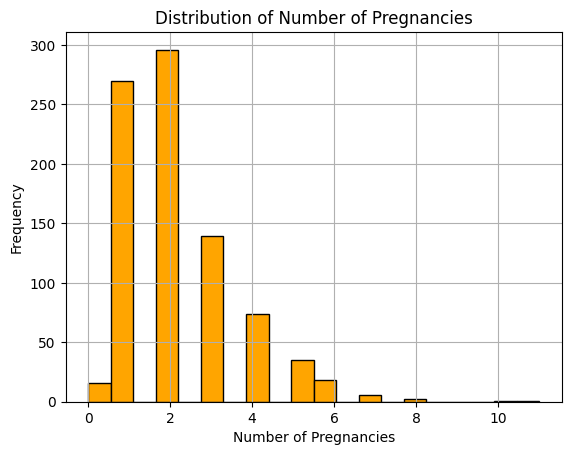

In [72]:

plt.hist(df['Num of pregnancies'].dropna(), bins=20, color='orange', edgecolor='black')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Pregnancies')
plt.grid(True)
plt.show()


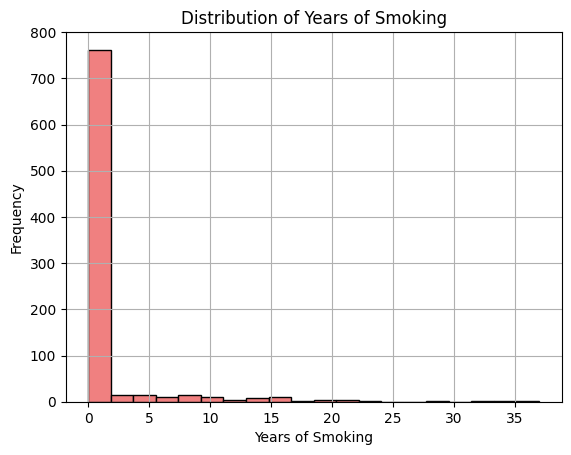

In [73]:

plt.hist(df['Smokes (years)'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Years of Smoking')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Smoking')
plt.grid(True)
plt.show()


In [74]:

selected_features = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                     'Num of pregnancies', 'Smokes (years)']

outliers = {}
for feature in selected_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]


for feature, outlier_values in outliers.items():
    print(f"Outliers for {feature}:")
    print(outlier_values)
    print()


Outliers for Age:
3      52
6      51
652    59
667    79
668    84
671    52
676    70
682    70
Name: Age, dtype: int64

Outliers for Number of sexual partners:
3      5.0
26     5.0
29     6.0
52     5.0
56     5.0
      ... 
796    7.0
804    8.0
812    5.0
837    9.0
844    8.0
Name: Number of sexual partners, Length: 68, dtype: float64

Outliers for First sexual intercourse:
5      23.0
7      26.0
10     26.0
13     25.0
19     27.0
26     23.0
28     24.0
29     26.0
38     24.0
69     23.0
75     27.0
80     27.0
89     32.0
93     29.0
113    23.0
128    29.0
138    28.0
147    10.0
162    23.0
211    26.0
215    24.0
242    23.0
312    27.0
467    10.0
479    24.0
487    26.0
492    26.0
500    29.0
560    24.0
563    28.0
569    25.0
585    28.0
607    29.0
614    23.0
676    27.0
681    29.0
705    23.0
777    26.0
824    27.0
831    23.0
856    24.0
Name: First sexual intercourse, dtype: float64

Outliers for Num of pregnancies:
17      8.0
100     7.0
263     7.0
337    

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)


In [15]:
X = df.drop(columns=['Dx:Cancer'])
y = df['Dx:Cancer']

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Initialize a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9825581395348837
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       167
           1       0.62      1.00      0.77         5

    accuracy                           0.98       172
   macro avg       0.81      0.99      0.88       172
weighted avg       0.99      0.98      0.98       172



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [76]:

from sklearn.model_selection import train_test_split

# Get the minimum and maximum values of features in the training set
X_train_min = X_train.min()
X_train_max = X_train.max()

# Get the minimum and maximum values of features in the testing set
X_test_min = X_test.min()
X_test_max = X_test.max()

# Get the minimum and maximum values of the target variable in the training set
y_train_min = y_train.min()
y_train_max = y_train.max()

# Get the minimum and maximum values of the target variable in the testing set
y_test_min = y_test.min()
y_test_max = y_test.max()

# Print
print("Minimum and maximum values of features in the training set:")
print("X_train_min:", X_train_min)
print("X_train_max:", X_train_max)
print()
print("Minimum and maximum values of features in the testing set:")
print("X_test_min:", X_test_min)
print("X_test_max:", X_test_max)
print()
print("Minimum and maximum values of the target variable in the training set:")
print("y_train_min:", y_train_min)
print("y_train_max:", y_train_max)
print()
print("Minimum and maximum values of the target variable in the testing set:")
print("y_test_min:", y_test_min)
print("y_test_max:", y_test_max)


Minimum and maximum values of features in the training set:
X_train_min: Age                                   14.0
Number of sexual partners              1.0
First sexual intercourse              10.0
Num of pregnancies                     0.0
Smokes                                 0.0
Smokes (years)                         0.0
Smokes (packs/year)                    0.0
Hormonal Contraceptives                0.0
Hormonal Contraceptives (years)        0.0
IUD                                    0.0
IUD (years)                            0.0
STDs                                   0.0
STDs (number)                          0.0
STDs:condylomatosis                    0.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS               

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the  variables
X_train_scaled = scaler.fit_transform(X_train[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']])
X_test_scaled = scaler.transform(X_test[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']])


In [81]:
from sklearn.preprocessing import StandardScaler

selected_numerical_features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[selected_numerical_features])

X_test_scaled = scaler.transform(X_test[selected_numerical_features])
X_train.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,686.000000,686.000000,686.00000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.00000,686.000000,686.000000
mean,26.666181,2.551218,16.96934,2.285896,0.137903,1.146960,0.410571,0.644952,2.259937,0.102007,...,0.090379,6.112902,5.782819,0.010204,0.018950,0.024781,0.039359,0.08309,0.056851,0.064140
std,8.177105,1.713820,2.78168,1.379342,0.342143,4.026404,2.149990,0.446959,3.489038,0.278398,...,0.311335,1.649027,1.591353,0.100572,0.136449,0.155572,0.194589,0.27622,0.231727,0.245181
min,14.000000,1.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,20.000000,2.000000,15.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,25.500000,2.000000,17.00000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,32.000000,3.000000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,2.445550,0.000000,...,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,79.000000,28.000000,32.00000,10.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [86]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9709302325581395


In [87]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_pred)

print("Training set accuracy:", train_accuracy)
print("Testing set accuracy:", test_accuracy)

Training set accuracy: 0.9810495626822158
Testing set accuracy: 0.9709302325581395


In [90]:
model_c_001 = LogisticRegression(C=0.01)
model_c_001.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01)

In [91]:
from sklearn.metrics import confusion_matrix

# Get predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Print confusion matrix and values
print("Confusion Matrix:")
print(conf_matrix)
print()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)


Confusion Matrix:
[[167   0]
 [  5   0]]

True Negatives: 167
False Positives: 0
False Negatives: 5
True Positives: 0


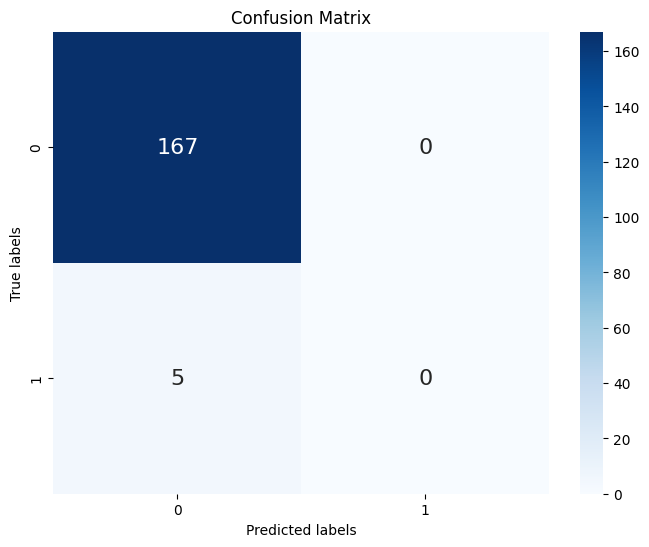

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [93]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9709302325581395
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       167
           1       0.00      0.00      0.00         5

    accuracy                           0.97       172
   macro avg       0.49      0.50      0.49       172
weighted avg       0.94      0.97      0.96       172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
total_predictions = conf_matrix.sum()
correct_predictions = tp + tn
accuracy = correct_predictions / total_predictions

print("Classification Accuracy:", accuracy)


Classification Accuracy: 0.9709302325581395


In [95]:
misclassified_instances = fp + fn
error = misclassified_instances / total_predictions

print("Classification Error:", error)


Classification Error: 0.029069767441860465


In [99]:
# Compute True Positive Rate (TPR)
tpr = tp / (tp + fn)

print("True Positive Rate (TPR):", tpr)


True Positive Rate (TPR): 0.0


In [100]:
# Compute False Positive Rate (FPR)
fpr = fp / (fp + tn)

print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.0


In [101]:
# Compute Specificity (TNR)
specificity = tn / (tn + fp)

print("Specificity (TNR):", specificity)


Specificity (TNR): 1.0


In [103]:
probabilities = model.predict_proba(X_test_scaled[:10])

print("Predicted Probabilities for Class 0 and Class 1:")
for i, probs in enumerate(probabilities):
    print(f"Instance {i+1}: Class 0 - {probs[0]}, Class 1 - {probs[1]}")


Predicted Probabilities for Class 0 and Class 1:
Instance 1: Class 0 - 0.9938259209521234, Class 1 - 0.006174079047876628
Instance 2: Class 0 - 0.9872755057306585, Class 1 - 0.012724494269341509
Instance 3: Class 0 - 0.9804631686006106, Class 1 - 0.01953683139938943
Instance 4: Class 0 - 0.9832354828923271, Class 1 - 0.01676451710767286
Instance 5: Class 0 - 0.9917618621438887, Class 1 - 0.008238137856111221
Instance 6: Class 0 - 0.9913604632347084, Class 1 - 0.00863953676529163
Instance 7: Class 0 - 0.9930300985664543, Class 1 - 0.006969901433545725
Instance 8: Class 0 - 0.9892430981437641, Class 1 - 0.010756901856235903
Instance 9: Class 0 - 0.9848337557236242, Class 1 - 0.015166244276375768
Instance 10: Class 0 - 0.9674776244569298, Class 1 - 0.03252237554307028


These are the predicted probabilities for the first 10 instances, where Class 0 represents the negative class and Class 1 is high, it suggests that the model believes there is a higher likelihood of cancer.

In [106]:
import pandas as pd


all_probabilities = model.predict_proba(X_test_scaled)


probabilities_df = pd.DataFrame(all_probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])


probabilities_df.index = range(1, len(probabilities_df) + 1)

if probabilities_df.loc[1, 'Probability_Class_0'] > probabilities_df.loc[1, 'Probability_Class_1']:
    title = "Predicted Probabilities - No Cancer (Class 0) and Chance of Cancer (Class 1)"
else:
    title = "Predicted Probabilities - Chance of No Cancer (Class 0) and Cancer (Class 1)"

# Display the title

print(title)
print(probabilities_df)


Predicted Probabilities - No Cancer (Class 0) and Chance of Cancer (Class 1)
     Probability_Class_0  Probability_Class_1
1               0.993826             0.006174
2               0.987276             0.012724
3               0.980463             0.019537
4               0.983235             0.016765
5               0.991762             0.008238
..                   ...                  ...
168             0.989069             0.010931
169             0.987409             0.012591
170             0.987281             0.012719
171             0.984367             0.015633
172             0.988744             0.011256

[172 rows x 2 columns]


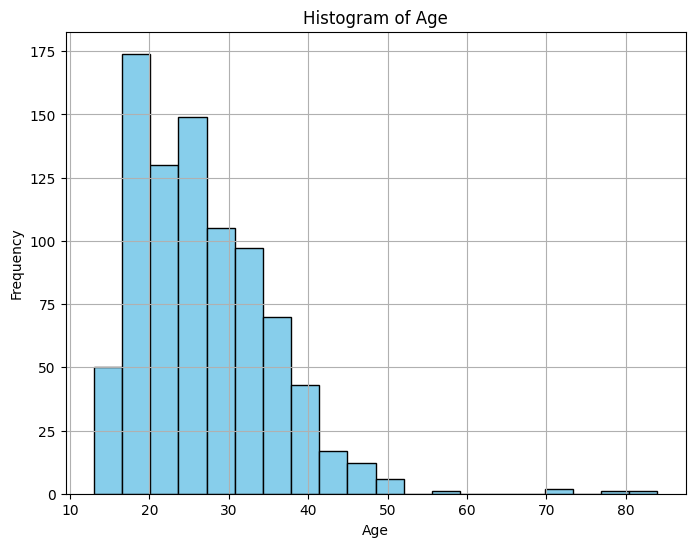

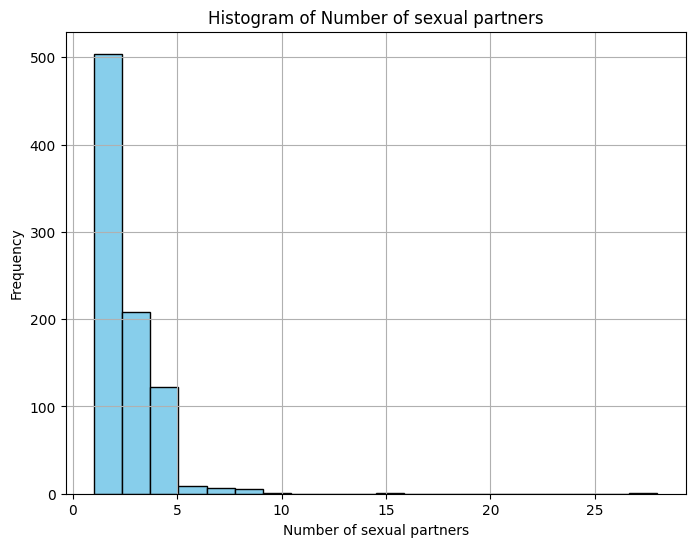

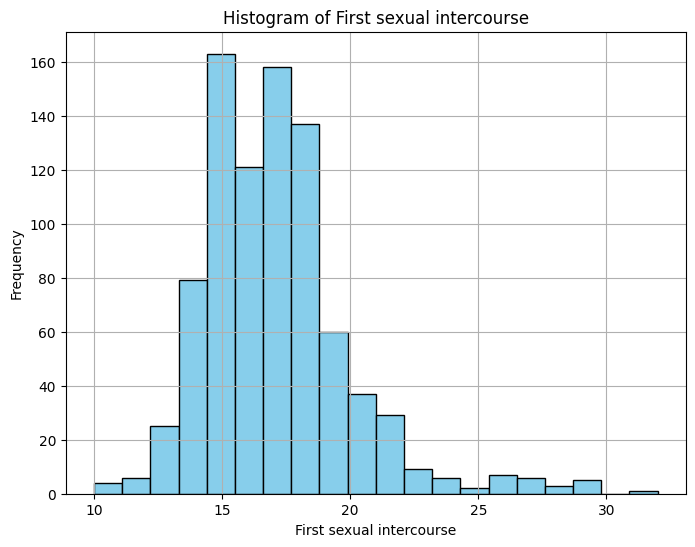

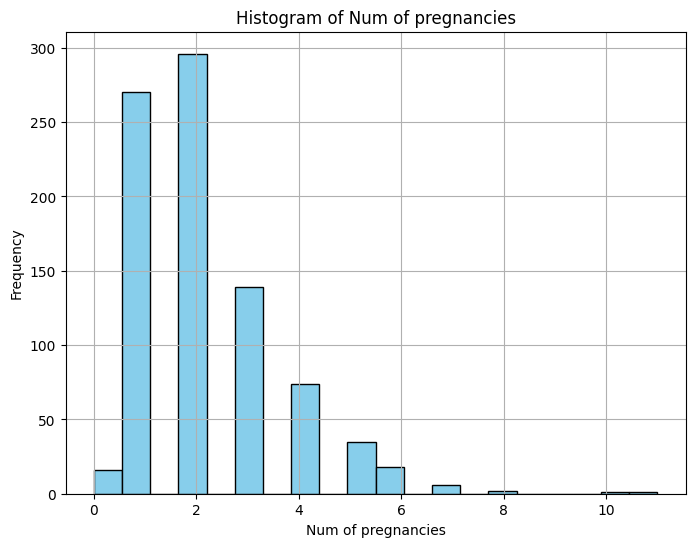

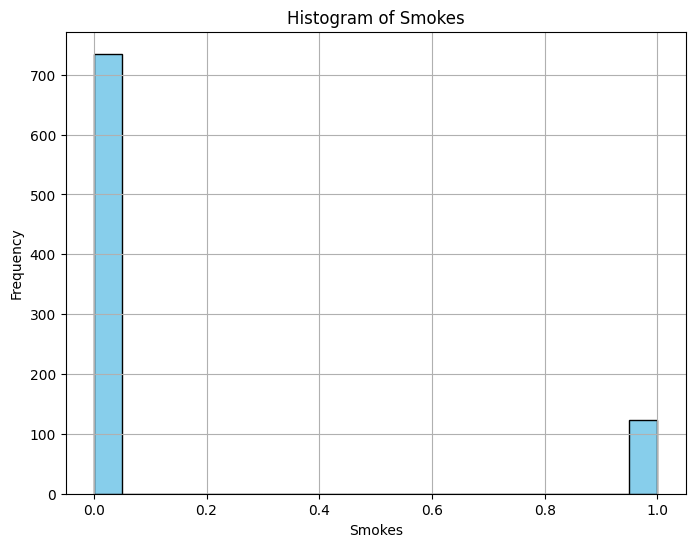

In [109]:
import matplotlib.pyplot as plt

# Plot histograms for each of the five variables
for column in ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes']:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



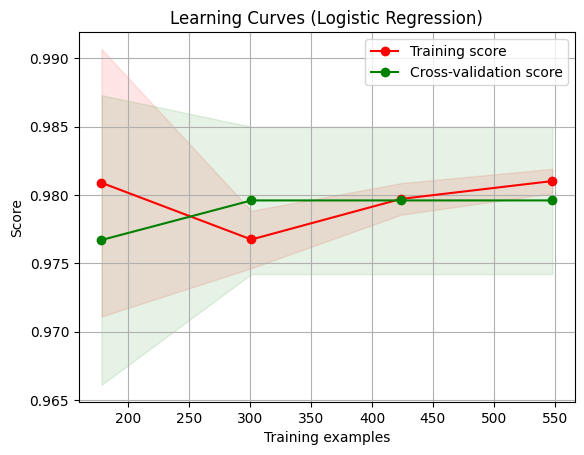

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Plot learning curves
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(model, title, X_train_scaled, y_train, cv=5, n_jobs=-1)

plt.show()


In [113]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")


Cross-Validation Scores: [0.98550725 0.97810219 0.97080292 0.97810219 0.99270073]
Mean Cross-Validation Score: 0.9810
Standard Deviation of Cross-Validation Scores: 0.0075


In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100, 1000]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.981053633767058


**Comments:**

* Accuracy 98%
* Cross-Validation Scores: 0.0075
* Classification Accuracy: 0.9709302325581395
* Classification Error: 0.029069767441860465
* Specificity (TNR): 1.0

**Summary:**


1. **Model Performance**: The logistic regression model achieved an impressive cross-validation accuracy of approximately 98.11%, indicating its effectiveness in predicting the presence or absence of cervical cancer based on the provided features.

2. **Best Hyperparameters**: The optimal hyperparameters for the logistic regression model were identified as a regularization parameter (C) of 0.1 and an 'l2' penalty.

3. **Significant Features**: Important features contributing to the prediction of cervical cancer include age, number of sexual partners, first sexual intercourse age, and potentially other demographic and clinical factors.

4. **Considerations**: It's important to acknowledge potential limitations such as dataset size, feature selection, and the presence of outliers or missing values, which could impact the model's performance and interpretation of results.

**Overall**, the logistic regression analysis provides valuable insights into the early detection and intervention of cervical cancer.
